Exact same functionality as Hasith's network example code

In [2]:
import numpy as np
import networkx as nx 
import station as st
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def basic_graph_2(stations_input, destinations_input):
  stations = np.array(stations_input)
  destinations = np.array(destinations_input)

  n_stations = stations.shape[0]
  n_destinations = destinations.shape[0]

  total_nodes = np.concatenate((stations, destinations), axis=0)
  distances = np.zeros((total_nodes.shape[0], total_nodes.shape[0]))
  for i in range(total_nodes.shape[0]):
      for j in range(i+1, total_nodes.shape[0]):
            distances[i,j] = np.linalg.norm(total_nodes[i] - total_nodes[j])
            # For asymmetric distances
            # distances[j,i] = distances[i,j]

  # make graph from distances as adjacency matrix
  G = nx.Graph()
  for i in range(n_stations):
      G.add_node(i)
      G.nodes[i]['type'] = 'station'
      G.nodes[i]['data'] = st.Station(5, np.random.randint(0,6))
  for i in range(n_stations, n_stations+n_destinations):
      G.add_node(i)
      G.nodes[i]['type'] = 'destination'
      G.nodes[i]['data'] = None # TODO: edit this later

  for i in range(total_nodes.shape[0]):
      for j in range(i+1, total_nodes.shape[0]):
          G.add_edge(i, j, weight=distances[i,j])
          # For asymmetric distances
          # G.add_edge(j, i, weight=distances[j,i])

  return G, total_nodes

def basic_weights():
    return np.array([1, 1, 1, 1])/4

This function adjust_coords i haven't finalized but rn i have it creating random coordinates for stations and end destinations (integer only for both X and Y). Stations and end destinations also overlap currently.

In [4]:
def adjust_coords(num_stations, x_bounds, y_bounds):

  #manually input coordinates
  # stations_input = [
  #   [5,9],
  #   [3,9],
  #   [8,9],
  #   [8,14],
  #   [3,14]
  #   ]
  # destinations_input = [
  #   [5.25,12.25],
  #   [10.5,10],
  #   [4.5,8],
  #   [2.5,9.5],
  #   [7,8]
  #   ]

  #randomly input coordinates (integers, but can change to floats by doing random.uniform)
  stations_input = np.array([
      [random.randint(x_bounds[0], x_bounds[1]), random.randint(y_bounds[0], y_bounds[1])]
      for _ in range(num_stations)
  ])
  destinations_input = np.array([
      [random.randint(x_bounds[0], x_bounds[1]), random.randint(y_bounds[0], y_bounds[1])]
      for _ in range(num_stations)
  ])

  return stations_input, destinations_input

This code is where we can input our parameters into adjust coords function and then output the nodes overlayed on an image of ut (ut-map2.png). The matplot fig acts as a grid essentially

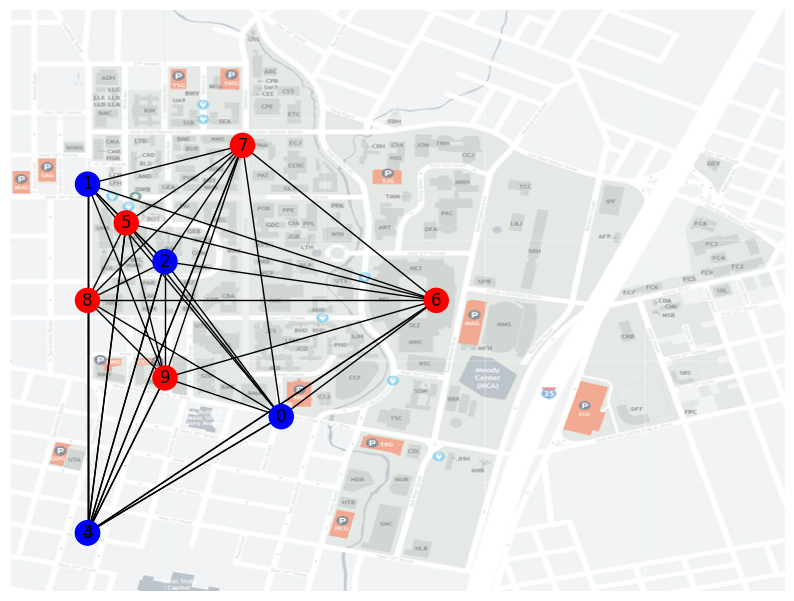

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.image as mpimg

# create graph
n_stations = 5
x_bounds = (2,12)
y_bounds = (4,15)
stations_input, destinations_input = adjust_coords(n_stations, x_bounds, y_bounds)
G, total_nodes = basic_graph_2(stations_input, destinations_input)
pos = {i: total_nodes[i] for i in range(total_nodes.shape[0])}
colors = ['r' if G.nodes[i]['type'] == 'destination' else 'b' for i in G.nodes]

# Load the map image
map_image = mpimg.imread('images/ut-map2.png') 

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

#show map as the background
map_center = (10, 10)
map_width = 20
map_height = 15
map_extent = [
    map_center[0] - map_width / 2, 
    map_center[0] + map_width / 2,
    map_center[1] - map_height / 2, 
    map_center[1] + map_height / 2
]

#alpha is transparency level
ax.imshow(map_image, extent=map_extent, alpha=0.5) 

#Draw the graph on top of the map
nx.draw(
    G,
    pos,
    node_color=colors,
    with_labels=True,
    ax=ax,
)
plt.show()
